In [ ]:
import tensorflow.keras as keras
keras.__version__

'2.11.0'

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from  tensorflow.keras import models
from  tensorflow.keras import layers
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
(train_images , train_labels),(test_images, test_labels)= cifar10.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True)

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

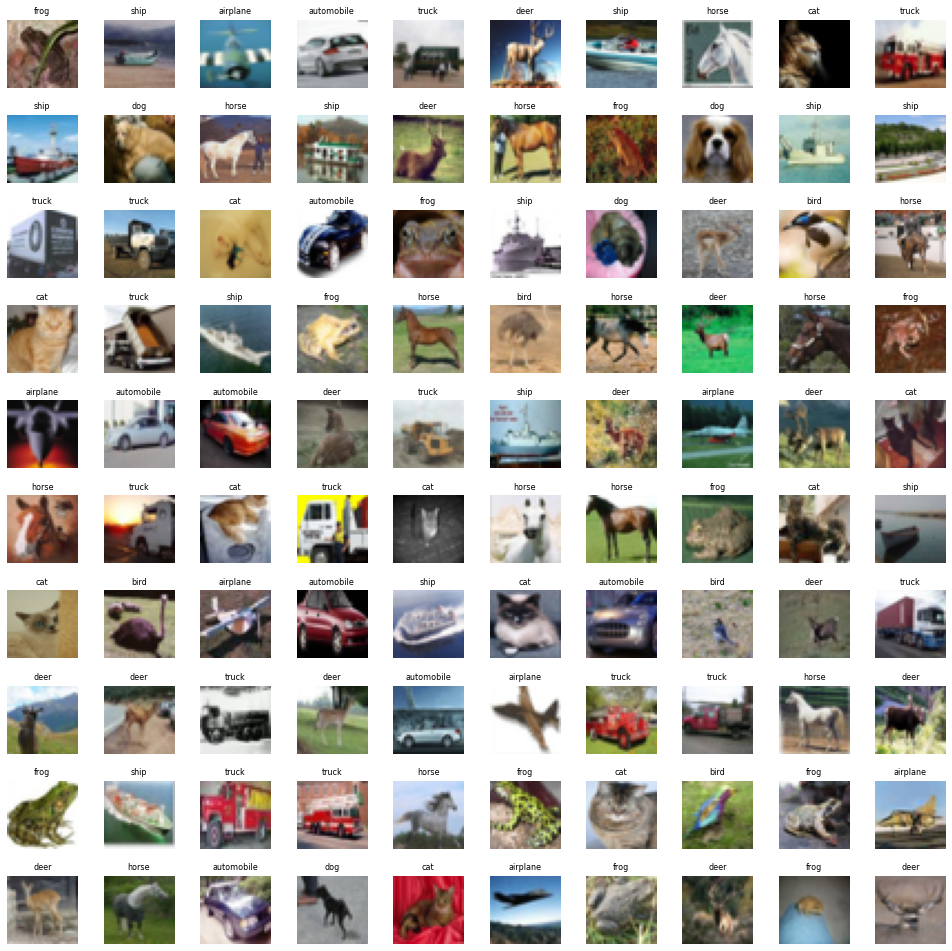

In [ ]:
fig, axes = plt.subplots(10, 10, figsize = (17,17))
axes = axes.ravel() 
n_train = len(x_train) 
for i in np.arange(0, 10 * 10): 
    index = np.random.randint(0, n_train)   
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

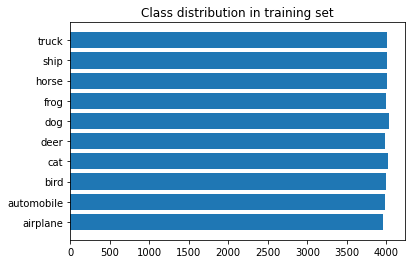

In [ ]:
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(labels, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

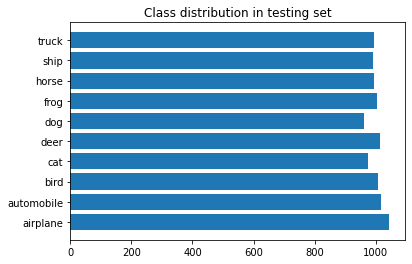

In [ ]:
classes, counts = np.unique(y_val, return_counts=True)
plt.barh(labels, counts)
plt.title('Class distribution in testing set')

### Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:


train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Learning

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=7,
                    validation_data=(test_images, test_labels))

Epoch 1/7
391/391 [==============================] - 130s 330ms/step - loss: 0.8741 - accuracy: 0.6930 - val_loss: 0.9274 - val_accuracy: 0.6743
Epoch 2/7
391/391 [==============================] - 132s 339ms/step - loss: 0.8236 - accuracy: 0.7113 - val_loss: 0.8960 - val_accuracy: 0.6824
Epoch 3/7
391/391 [==============================] - 132s 337ms/step - loss: 0.7871 - accuracy: 0.7250 - val_loss: 0.8904 - val_accuracy: 0.6930
Epoch 4/7
391/391 [==============================] - 132s 338ms/step - loss: 0.7550 - accuracy: 0.7371 - val_loss: 0.8911 - val_accuracy: 0.6918
Epoch 5/7
391/391 [==============================] - 134s 342ms/step - loss: 0.7308 - accuracy: 0.7449 - val_loss: 0.8385 - val_accuracy: 0.7123
Epoch 6/7
391/391 [==============================] - 131s 335ms/step - loss: 0.6987 - accuracy: 0.7547 - val_loss: 0.8641 - val_accuracy: 0.7051
Epoch 7/7
391/391 [==============================] - 130s 332ms/step - loss: 0.6786 - accuracy: 0.7627 - val_loss: 0.8565 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 6s 20ms/step - loss: 0.8565 - accuracy: 0.7057


In [ ]:
test_acc

0.7056999802589417

In [ ]:
test_loss

0.856513261795044